# Relational Databases

* consist of tables.
* Table consist of row and column.
* Table can be related.(Relational)

# Connecting to your Database

### SQLAlchemy

* Core (Rational model focused)
* ORM  (User data model focused)


#### Engine -> common interface to database.
#### Refelction -> Read database and create table object.

In [66]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///census.sqlite')
connection  = engine.connect()
print(engine.table_names())

['census', 'state_fact']


In [2]:
from sqlalchemy import MetaData, Table
metadata = MetaData()
census = Table('census',metadata,autoload=True,autoload_with=engine)
print(repr(census))

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


In [3]:
# Print the column names
print(census.columns.keys(),end='\n\n\n')

# Print full table metadata
print(repr(metadata.tables['census']))

['state', 'sex', 'age', 'pop2000', 'pop2008']


Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


# SQL Statements

* Select ,Insert, Update and Delete data
* create and ulter data

* SELECT column_name FROM table_name
* SELECT state FROM census
* SELECT * FROM census

In [5]:
stmt = 'SELECT * FROM census'
result_proxy = connection.execute(stmt)
result = result_proxy.fetchall()

In [9]:
type(result)

list

In [12]:
first_row = result[0]
print(first_row)
print(first_row.keys())

('Illinois', 'M', 0, 89600, 95012)
['state', 'sex', 'age', 'pop2000', 'pop2008']


In [18]:
from sqlalchemy import Table,MetaData,select
metadata = MetaData()
census = Table('census',metadata,autoload=True,autoload_with = engine)
stmt = select([census])
results = connection.execute(stmt).fetchall() 

In [20]:
print(stmt)

SELECT census.state, census.sex, census.age, census.pop2000, census.pop2008 
FROM census


In [21]:
# Get the first row of the results by using an index: first_row
first_row = results[0]

# Print the first row of the results
print(first_row)

# Print the first column of the first row by using an index
print(first_row[0])

# Print the 'state' column of the first row by using its name
print(first_row['state'])

('Illinois', 'M', 0, 89600, 95012)
Illinois
Illinois


## Where clauses

* Restrict data return by a query based on boolean condition.
* compare column against a value or another column.
* in_(), like(), between()

##### Conjuction

* and_(),not_(),or_()

In [24]:
stmt = select([census])
stmt = stmt.where(census.columns.state == 'Illinois')
results = connection.execute(stmt).fetchall()
for result in results:
    print(result.state,result.age)

Illinois 0
Illinois 1
Illinois 2
Illinois 3
Illinois 4
Illinois 5
Illinois 6
Illinois 7
Illinois 8
Illinois 9
Illinois 10
Illinois 11
Illinois 12
Illinois 13
Illinois 14
Illinois 15
Illinois 16
Illinois 17
Illinois 18
Illinois 19
Illinois 20
Illinois 21
Illinois 22
Illinois 23
Illinois 24
Illinois 25
Illinois 26
Illinois 27
Illinois 28
Illinois 29
Illinois 30
Illinois 31
Illinois 32
Illinois 33
Illinois 34
Illinois 35
Illinois 36
Illinois 37
Illinois 38
Illinois 39
Illinois 40
Illinois 41
Illinois 42
Illinois 43
Illinois 44
Illinois 45
Illinois 46
Illinois 47
Illinois 48
Illinois 49
Illinois 50
Illinois 51
Illinois 52
Illinois 53
Illinois 54
Illinois 55
Illinois 56
Illinois 57
Illinois 58
Illinois 59
Illinois 60
Illinois 61
Illinois 62
Illinois 63
Illinois 64
Illinois 65
Illinois 66
Illinois 67
Illinois 68
Illinois 69
Illinois 70
Illinois 71
Illinois 72
Illinois 73
Illinois 74
Illinois 75
Illinois 76
Illinois 77
Illinois 78
Illinois 79
Illinois 80
Illinois 81
Illinois 82
Illinois 83
Il

In [25]:
stmt = select([census])
stmt = stmt.where(census.columns.state.startswith('New'))
for result in connection.execute(stmt):
    print(result.state,result.pop2000)

New Jersey 56983
New Jersey 56686
New Jersey 57011
New Jersey 57912
New Jersey 59359
New Jersey 60392
New Jersey 60739
New Jersey 61579
New Jersey 62089
New Jersey 63384
New Jersey 64593
New Jersey 62494
New Jersey 60570
New Jersey 58189
New Jersey 57931
New Jersey 56752
New Jersey 55887
New Jersey 56712
New Jersey 53265
New Jersey 48344
New Jersey 49564
New Jersey 48141
New Jersey 48353
New Jersey 49130
New Jersey 48723
New Jersey 51092
New Jersey 50357
New Jersey 52179
New Jersey 55938
New Jersey 60638
New Jersey 64220
New Jersey 61484
New Jersey 61927
New Jersey 63487
New Jersey 66737
New Jersey 71274
New Jersey 71449
New Jersey 71026
New Jersey 71811
New Jersey 72043
New Jersey 73665
New Jersey 70514
New Jersey 69835
New Jersey 68650
New Jersey 65564
New Jersey 65529
New Jersey 61817
New Jersey 59206
New Jersey 56977
New Jersey 55780
New Jersey 56235
New Jersey 53235
New Jersey 54900
New Jersey 58013
New Jersey 43584
New Jersey 42959
New Jersey 42179
New Jersey 45575
New Jersey 383

In [26]:
from sqlalchemy import or_
stmt = select([census])
stmt = stmt.where(or_(census.columns.state == 'California',census.columns.state == 'New York'))
for result in connection.execute(stmt):
    print(result.state,result.sex)


New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
California M
California M
California M
California M
California M
California M
California M
Califor

# Working with PostgreSQL Database

* Use the psycopg2 database driver as it supports practically all of PostgreSQL's features efficiently and is the standard dialect for PostgreSQL in SQLAlchemy.

* There are three components to the connection string in this exercise: the dialect and driver ('postgresql+psycopg2://'), followed by the username and password ('student:datacamp'), followed by the host and port ('@postgresql.csrrinzqubik.us-east-1.rds.amazonaws.com:5432/'), and finally, the database name ('census'). You will have to pass this string as an argument to create_engine() in order to connect to the database.

In [28]:
import psycopg2

# Import create_engine function
from sqlalchemy import create_engine

# Create an engine to the census database
engine = create_engine('postgresql+psycopg2://'
'student:datacamp'
'@postgresql.csrrinzqubik.us-east-1.rds.amazonaws.com'
':5432/census')

# Use the .table_names() method on the engine to print the table names
print(engine.table_names())

['census', 'state_fact', 'data', 'users']


In [29]:
# Create a select query: stmt
stmt = select([census])

# Add a where clause to filter the results to only those for New York
stmt = stmt.where(census.columns.state == 'New York')

# Execute the query to retrieve all the data returned: results
results = connection.execute(stmt).fetchall()

# Loop over the results and print the age, sex, and pop2008
for result in results:
    print(result.age, result.sex, result.pop2008)

0 M 128088
1 M 125649
2 M 121615
3 M 120580
4 M 122482
5 M 121205
6 M 120089
7 M 122355
8 M 118653
9 M 117369
10 M 118810
11 M 121121
12 M 126338
13 M 128713
14 M 129812
15 M 134463
16 M 136569
17 M 140114
18 M 156892
19 M 147556
20 M 146611
21 M 141932
22 M 138557
23 M 136150
24 M 132383
25 M 141850
26 M 129603
27 M 131419
28 M 127224
29 M 122449
30 M 126404
31 M 126124
32 M 123362
33 M 126486
34 M 120030
35 M 123017
36 M 127076
37 M 136270
38 M 144715
39 M 135027
40 M 135355
41 M 132905
42 M 140025
43 M 151555
44 M 149030
45 M 148147
46 M 146692
47 M 147648
48 M 155155
49 M 144287
50 M 143466
51 M 139630
52 M 133939
53 M 136723
54 M 125953
55 M 122478
56 M 118070
57 M 115823
58 M 117177
59 M 108293
60 M 106825
61 M 113681
62 M 83763
63 M 81226
64 M 76961
65 M 82242
66 M 70423
67 M 64117
68 M 63657
69 M 58801
70 M 57609
71 M 53231
72 M 51132
73 M 50696
74 M 44822
75 M 43592
76 M 41900
77 M 40417
78 M 40241
79 M 35941
80 M 34659
81 M 32022
82 M 28890
83 M 27217
84 M 23879
85 M 124478
0

In [32]:
# Create a query for the census table: stmt
states = ['New York', 'California', 'Texas']
stmt = select([census])

# Append a where clause to match all the states in_ the list states
stmt = stmt.where(census.columns.state.in_(states))

# Loop over the ResultProxy and print the state and its population in 2000
for result in connection.execute(stmt):
    print(result.state, result.pop2000)

New York 126237
New York 124008
New York 124725
New York 126697
New York 131357
New York 133095
New York 134203
New York 137986
New York 139455
New York 142454
New York 145621
New York 138746
New York 135565
New York 132288
New York 132388
New York 131959
New York 130189
New York 132566
New York 132672
New York 133654
New York 132121
New York 126166
New York 123215
New York 121282
New York 118953
New York 123151
New York 118727
New York 122359
New York 128651
New York 140687
New York 149558
New York 139477
New York 138911
New York 139031
New York 145440
New York 156168
New York 153840
New York 152078
New York 150765
New York 152606
New York 159345
New York 148628
New York 147892
New York 144195
New York 139354
New York 141953
New York 131875
New York 128767
New York 125406
New York 124155
New York 125955
New York 118542
New York 118532
New York 124418
New York 95025
New York 92652
New York 90096
New York 95340
New York 83273
New York 77213
New York 77054
New York 72212
New York 70967
N

In [33]:
# Import and_
from sqlalchemy import and_

# Build a query for the census table: stmt
stmt = select([census])

# Append a where clause to select only non-male records from California using and_
stmt = stmt.where(
    # The state of California with a non-male sex
    and_(census.columns.state == 'California',
         census.columns.sex != 'M'
         )
)

# Loop over the ResultProxy printing the age and sex
for result in connection.execute(stmt):
    print(result.age, result.sex)


0 F
1 F
2 F
3 F
4 F
5 F
6 F
7 F
8 F
9 F
10 F
11 F
12 F
13 F
14 F
15 F
16 F
17 F
18 F
19 F
20 F
21 F
22 F
23 F
24 F
25 F
26 F
27 F
28 F
29 F
30 F
31 F
32 F
33 F
34 F
35 F
36 F
37 F
38 F
39 F
40 F
41 F
42 F
43 F
44 F
45 F
46 F
47 F
48 F
49 F
50 F
51 F
52 F
53 F
54 F
55 F
56 F
57 F
58 F
59 F
60 F
61 F
62 F
63 F
64 F
65 F
66 F
67 F
68 F
69 F
70 F
71 F
72 F
73 F
74 F
75 F
76 F
77 F
78 F
79 F
80 F
81 F
82 F
83 F
84 F
85 F


# Overview of Ordering



In [34]:
# Build a query to select the state column: stmt
stmt = select([census.columns.state])

# Order stmt by the state column
stmt = stmt.order_by(census.columns.state)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the first 10 results
print(results[:10])

[('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',)]


In [35]:
# Import desc
from sqlalchemy import desc

# Build a query to select the state column: stmt
stmt = select([census.columns.state])

# Order stmt by state in descending order: rev_stmt
rev_stmt = stmt.order_by(desc(census.columns.state))

# Execute the query and store the results: rev_results
rev_results = connection.execute(rev_stmt).fetchall()

# Print the first 10 rev_results
print(rev_results[:10])


[('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',)]


In [36]:
# Build a query to select state and age: stmt
stmt = select([census.columns.state, census.columns.age])

# Append order by to ascend by state and descend by age
stmt = stmt.order_by(census.columns.state, census.columns.age)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print the first 20 results
print(results[:20])

[('Alabama', 0), ('Alabama', 0), ('Alabama', 1), ('Alabama', 1), ('Alabama', 2), ('Alabama', 2), ('Alabama', 3), ('Alabama', 3), ('Alabama', 4), ('Alabama', 4), ('Alabama', 5), ('Alabama', 5), ('Alabama', 6), ('Alabama', 6), ('Alabama', 7), ('Alabama', 7), ('Alabama', 8), ('Alabama', 8), ('Alabama', 9), ('Alabama', 9)]


# Counting, Summing and Grouping Data
#### SQL Functions

* E.g. Count, Sum
* from sqlalchemy import func
* More efficient than processing in Python
* Aggregate data

In [37]:
from sqlalchemy import func
stmt = select([func.sum(census.columns.pop2008)])
results = connection.execute(stmt).scalar()
print(results)

302876613


# Group by

* Allows us to group row by common values

* Supports multiple columns to group by with a
    pattern similar to order_by()

*  Requires all selected columns to be grouped or
    aggregated by a function

In [40]:
stmt = select([census.columns.sex,func.sum(census.columns.pop2008)])
stmt = stmt.group_by(census.columns.sex)
results = connection.execute(stmt).fetchall()
results

[('F', 153959198), ('M', 148917415)]

In [41]:
stmt = select([census.columns.sex,census.columns.age,func.sum(census.columns.pop2008)])
stmt = stmt.group_by(census.columns.sex,census.columns.age)
results = connection.execute(stmt).fetchall()
results

[('F', 0, 2105442),
 ('F', 1, 2087705),
 ('F', 2, 2037280),
 ('F', 3, 2012742),
 ('F', 4, 2014825),
 ('F', 5, 1991082),
 ('F', 6, 1977923),
 ('F', 7, 2005470),
 ('F', 8, 1925725),
 ('F', 9, 1905935),
 ('F', 10, 1909338),
 ('F', 11, 1923628),
 ('F', 12, 1960942),
 ('F', 13, 1990284),
 ('F', 14, 2007966),
 ('F', 15, 2047109),
 ('F', 16, 2086274),
 ('F', 17, 2118217),
 ('F', 18, 2151506),
 ('F', 19, 2071680),
 ('F', 20, 2042212),
 ('F', 21, 2023820),
 ('F', 22, 2035751),
 ('F', 23, 2047109),
 ('F', 24, 2010175),
 ('F', 25, 2043330),
 ('F', 26, 2071963),
 ('F', 27, 2114346),
 ('F', 28, 2111476),
 ('F', 29, 2009546),
 ('F', 30, 1955430),
 ('F', 31, 1933802),
 ('F', 32, 1887669),
 ('F', 33, 1944248),
 ('F', 34, 1893332),
 ('F', 35, 1944749),
 ('F', 36, 2038510),
 ('F', 37, 2158525),
 ('F', 38, 2188432),
 ('F', 39, 2074738),
 ('F', 40, 2040883),
 ('F', 41, 2051985),
 ('F', 42, 2107555),
 ('F', 43, 2251441),
 ('F', 44, 2296876),
 ('F', 45, 2294913),
 ('F', 46, 2300277),
 ('F', 47, 2330046),
 (

In [43]:
print(results[0].keys())

['sex', 'age', 'sum_1']


In [48]:
stmt = select([census.columns.sex,func.sum(census.columns.pop2008).label('pop2008_sum')])
stmt = stmt.group_by(census.columns.sex)
results = connection.execute(stmt).fetchall()
results[0].keys()

['sex', 'pop2008_sum']

In [49]:
# Build a query to count the distinct states values: stmt
stmt = select([func.count(census.columns.state.distinct())])

# Execute the query and store the scalar result: distinct_state_count
distinct_state_count = connection.execute(stmt).scalar()

# Print the distinct_state_count
print(distinct_state_count)

51


## Handling ResultSets from Functions

* SQLAlchemy auto generates “column names” for functions
    in the ResultSet
* The column names are o!en func_# such as
    count_1
* Replace them with the label() method

In [54]:
# Import func
from sqlalchemy import func

# Build a query to select the state and count of ages by state: stmt
stmt = select([census.columns.state, func.count(census.columns.age)])

# Group stmt by state
stmt = stmt.group_by(census.columns.state)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print results
print(results)

# Print the keys/column names of the results returned
print(results[0].keys())

[('Alabama', 172), ('Alaska', 172), ('Arizona', 172), ('Arkansas', 172), ('California', 172), ('Colorado', 172), ('Connecticut', 172), ('Delaware', 172), ('District of Columbia', 172), ('Florida', 172), ('Georgia', 172), ('Hawaii', 172), ('Idaho', 172), ('Illinois', 172), ('Indiana', 172), ('Iowa', 172), ('Kansas', 172), ('Kentucky', 172), ('Louisiana', 172), ('Maine', 172), ('Maryland', 172), ('Massachusetts', 172), ('Michigan', 172), ('Minnesota', 172), ('Mississippi', 172), ('Missouri', 172), ('Montana', 172), ('Nebraska', 172), ('Nevada', 172), ('New Hampshire', 172), ('New Jersey', 172), ('New Mexico', 172), ('New York', 172), ('North Carolina', 172), ('North Dakota', 172), ('Ohio', 172), ('Oklahoma', 172), ('Oregon', 172), ('Pennsylvania', 172), ('Rhode Island', 172), ('South Carolina', 172), ('South Dakota', 172), ('Tennessee', 172), ('Texas', 172), ('Utah', 172), ('Vermont', 172), ('Virginia', 172), ('Washington', 172), ('West Virginia', 172), ('Wisconsin', 172), ('Wyoming', 17

        state  count_1
0     Alabama      172
1      Alaska      172
2     Arizona      172
3    Arkansas      172
4  California      172


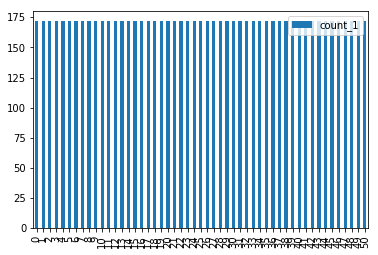

In [56]:
# Import Pyplot as plt from matplotlib
import matplotlib.pyplot as plt

# Create a DataFrame from the results: df
df = pd.DataFrame(results)

# Set Column names
df.columns = results[0].keys()

# Print the DataFrame
print(df.head())

# Plot the DataFrame
df.plot.bar()
plt.show()

In [51]:
# Import func
from sqlalchemy import func

# Build an expression to calculate the sum of pop2008 labeled as population
pop2008_sum = func.sum(census.columns.pop2008).label('population')

# Build a query to select the state and sum of pop2008: stmt
stmt = select([census.columns.state, pop2008_sum])

# Group stmt by state
stmt = stmt.group_by(census.columns.state)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print results
print(results)

# Print the keys/column names of the results returned
print(results[0].keys())

[('Alabama', 4649367), ('Alaska', 664546), ('Arizona', 6480767), ('Arkansas', 2848432), ('California', 36609002), ('Colorado', 4912947), ('Connecticut', 3493783), ('Delaware', 869221), ('District of Columbia', 588910), ('Florida', 18257662), ('Georgia', 9622508), ('Hawaii', 1250676), ('Idaho', 1518914), ('Illinois', 12867077), ('Indiana', 6373299), ('Iowa', 3000490), ('Kansas', 2782245), ('Kentucky', 4254964), ('Louisiana', 4395797), ('Maine', 1312972), ('Maryland', 5604174), ('Massachusetts', 6492024), ('Michigan', 9998854), ('Minnesota', 5215815), ('Mississippi', 2922355), ('Missouri', 5891974), ('Montana', 963802), ('Nebraska', 1776757), ('Nevada', 2579387), ('New Hampshire', 1314533), ('New Jersey', 8670204), ('New Mexico', 1974993), ('New York', 19465159), ('North Carolina', 9121606), ('North Dakota', 634282), ('Ohio', 11476782), ('Oklahoma', 3620620), ('Oregon', 3786824), ('Pennsylvania', 12440129), ('Rhode Island', 1046535), ('South Carolina', 4438870), ('South Dakota', 800997),

# SQLAlchemy and Pandas
* DataFrame can take a SQLAlchemy ResultSet
* Make sure to set the DataFrame columns to the ResultSet

In [52]:
# import pandas
import pandas as pd

# Create a DataFrame from the results: df
df = pd.DataFrame(results)

# Set column names
df.columns = results[0].keys()

# Print the Dataframe
print(df)

                   state  population
0                Alabama     4649367
1                 Alaska      664546
2                Arizona     6480767
3               Arkansas     2848432
4             California    36609002
5               Colorado     4912947
6            Connecticut     3493783
7               Delaware      869221
8   District of Columbia      588910
9                Florida    18257662
10               Georgia     9622508
11                Hawaii     1250676
12                 Idaho     1518914
13              Illinois    12867077
14               Indiana     6373299
15                  Iowa     3000490
16                Kansas     2782245
17              Kentucky     4254964
18             Louisiana     4395797
19                 Maine     1312972
20              Maryland     5604174
21         Massachusetts     6492024
22              Michigan     9998854
23             Minnesota     5215815
24           Mississippi     2922355
25              Missouri     5891974
2

# Calculating Values in a Query

In [57]:
stmt = select([census.columns.age,(census.columns.pop2008-census.columns.pop2000).label('pop_change')])
stmt = stmt.group_by(census.columns.age)
stmt = stmt.order_by(desc('pop_change'))

# top five result

stmt = stmt.limit(5)
results = connection.execute(stmt).fetchall()
print(results)

[(61, 52672), (85, 51901), (54, 50808), (58, 45575), (60, 44915)]


# Case Statement
* Used to treat data differently based on a condition
* Accepts a list of conditions to match and a column
    to return if the condition matches
* The list of conditions ends with an else clause to
    determine what to do when a record doesn’t match
    any prior conditions

In [58]:
from sqlalchemy import case
stmt = select([func.sum(case([(census.columns.state == 'New York',census.columns.pop2008)], else_=0))])
results = connection.execute(stmt).fetchall()
print(results)

[(19465159,)]


# Cast Statement
* Converts data to another type
* Useful for converting
* integers to floats for division
* strings to dates and times
* Accepts a column or expression and the target Type

In [60]:
from sqlalchemy import case, cast, Float
stmt = select([(func.sum(case([(census.columns.state == 'New York',census.columns.pop2008)], else_=0)) / cast(func.sum(census.columns.pop2008),Float) * 100).label('ny_percent')])
results = connection.execute(stmt).fetchall()
print(results)

[(Decimal('6.4267619765'),)]


/home/bat/anaconda2/envs/Python-3/lib/python3.5/site-packages/sqlalchemy/sql/sqltypes.py:596: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


In [62]:
# Import create_engine function
from sqlalchemy import create_engine

# Create an engine to the census database
engine = create_engine('mysql+pymysql://'
                        'student:datacamp'
                        '@courses.csrrinzqubik.us-east-1.rds.amazonaws.com:3306/'
                        'census')

# Print the table names
print(engine.table_names())


['census', 'state_fact']


In [63]:
# Build query to return state names by population difference from 2008 to 2000: stmt
stmt = select([census.columns.state, (census.columns.pop2008 - census.columns.pop2000).label('pop_change')])

# Append group by for the state: stmt
stmt = stmt.group_by(census.columns.state)

# Append order by for pop_change descendingly: stmt
stmt = stmt.order_by(desc('pop_change'))

# Return only 5 results: stmt
stmt = stmt.limit(5)

# Use connection to execute the statement and fetch all results
results = connection.execute(stmt).fetchall()

# Print the state and population change for each record
for result in results:
    print('{}:{}'.format(result.state, result.pop_change))

California:105705
Florida:100984
Texas:51901
New York:47098
Pennsylvania:42387


In [64]:
# import case, cast and Float from sqlalchemy
from sqlalchemy import case, cast, Float

# Build an expression to calculate female population in 2000
female_pop2000 = func.sum(
    case([
        (census.columns.sex == 'F', census.columns.pop2000)
    ], else_=0))

# Cast an expression to calculate total population in 2000 to Float
total_pop2000 = cast(func.sum(census.columns.pop2000), Float)

# Build a query to calculate the percentage of females in 2000: stmt
stmt = select([female_pop2000 / total_pop2000 * 100])

# Execute the query and store the scalar result: percent_female
percent_female = connection.execute(stmt).scalar()

# Print the percentage
print(percent_female)

51.0946743229


/home/bat/anaconda2/envs/Python-3/lib/python3.5/site-packages/sqlalchemy/sql/sqltypes.py:596: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


# Autojoin

In [70]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///census.sqlite')
connection  = engine.connect()
print(engine.table_names())

['census', 'state_fact']


In [74]:
state_fact = Table('state_fact',metadata,autoload=True,autoload_with=engine)

In [75]:
stmt = select([state_fact.columns.abbreviation])
results = connection.execute(stmt).fetchall()
print(results)

[('IL',), ('NJ',), ('ND',), ('OR',), ('DC',), ('WI',), ('AZ',), ('AR',), ('CO',), ('HI',), ('KS',), ('LA',), ('MT',), ('NE',), ('OK',), ('ID',), ('MA',), ('MI',), ('MO',), ('NC',), ('OH',), ('RI',), ('SC',), ('WY',), ('IN',), ('PA',), ('SD',), ('TN',), ('VT',), ('AK',), ('DE',), ('KY',), ('MS',), ('VA',), ('FL',), ('MD',), ('NV',), ('WA',), ('CA',), ('CT',), ('GA',), ('IA',), ('ME',), ('NH',), ('NM',), ('TX',), ('AL',), ('MN',), ('NY',), ('UT',), ('WV',)]


In [76]:
# Build a statement to join census and state_fact tables: stmt
stmt = select([census.columns.pop2000, state_fact.columns.abbreviation])

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))

pop2000 89600
abbreviation IL


In [77]:
# Build a statement to select the census and state_fact tables: stmt
stmt = select([census, state_fact])

# Add a select_from clause that wraps a join for the census and state_fact
# tables where the census state column and state_fact name column match
stmt = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name))

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))

state Illinois
sex M
age 0
pop2000 89600
pop2008 95012
id 13
name Illinois
abbreviation IL
country USA
type state
sort 10
status current
occupied occupied
notes 
fips_state 17
assoc_press Ill.
standard_federal_region V
census_region 2
census_region_name Midwest
census_division 3
census_division_name East North Central
circuit_court 7


In [78]:
# Build a statement to select the state, sum of 2008 population and census
# division name: stmt
stmt = select([
    census.columns.state,
    func.sum(census.columns.pop2008),
    state_fact.columns.census_division_name
])

# Append select_from to join the census and state_fact tables by the census state and state_fact name columns
stmt = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name)
)

# Append a group by for the state_fact name column
stmt = stmt.group_by(state_fact.columns.name)

# Execute the statement and get the results: results
results = connection.execute(stmt).fetchall()

# Loop over the the results object and print each record.
for record in results:
    print(record)


('Alabama', 4649367, 'East South Central')
('Alaska', 664546, 'Pacific')
('Arizona', 6480767, 'Mountain')
('Arkansas', 2848432, 'West South Central')
('California', 36609002, 'Pacific')
('Colorado', 4912947, 'Mountain')
('Connecticut', 3493783, 'New England')
('Delaware', 869221, 'South Atlantic')
('Florida', 18257662, 'South Atlantic')
('Georgia', 9622508, 'South Atlantic')
('Hawaii', 1250676, 'Pacific')
('Idaho', 1518914, 'Mountain')
('Illinois', 12867077, 'East North Central')
('Indiana', 6373299, 'East North Central')
('Iowa', 3000490, 'West North Central')
('Kansas', 2782245, 'West North Central')
('Kentucky', 4254964, 'East South Central')
('Louisiana', 4395797, 'West South Central')
('Maine', 1312972, 'New England')
('Maryland', 5604174, 'South Atlantic')
('Massachusetts', 6492024, 'New England')
('Michigan', 9998854, 'East North Central')
('Minnesota', 5215815, 'West North Central')
('Mississippi', 2922355, 'East South Central')
('Missouri', 5891974, 'West North Central')
('Mon

In [88]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///employees.sqlite')
connection  = engine.connect()
print(engine.table_names())

['employees']


In [93]:
employees = Table('employees',metadata,autoload=True,autoload_with=engine)
stmt = select([employee])
results = connection.execute(stmt).fetchall()
print(results)

ValueError: Couldn't parse datetime string: '12-17-1990'

In [95]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select manager's and their employees names: stmt
stmt = select(
    [managers.columns.name.label('manager'),
     employees.columns.name.label('employee')]
)

# Match managers id with employees mgr: stmt
stmt = stmt.where(managers.columns.id == employees.columns.mgr)

# Order the statement by the managers name: stmt
stmt = stmt.order_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt).fetchall()

# Print records
for record in results:
    print(record)

('FILLMORE', 'GRANT')
('FILLMORE', 'ADAMS')
('FILLMORE', 'MONROE')
('GARFIELD', 'JOHNSON')
('GARFIELD', 'LINCOLN')
('GARFIELD', 'POLK')
('GARFIELD', 'WASHINGTON')
('HARDING', 'TAFT')
('HARDING', 'HOOVER')
('JACKSON', 'HARDING')
('JACKSON', 'GARFIELD')
('JACKSON', 'FILLMORE')
('JACKSON', 'ROOSEVELT')


In [96]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select managers and counts of their employees: stmt
stmt = select([managers.columns.name, func.count(employees.columns.id)])

# Append a where clause that ensures the manager id and employee mgr are equal
stmt = stmt.where(managers.columns.id == employees.columns.mgr)

# Group by Managers Name
stmt = stmt.group_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt).fetchall()

# print manager
for record in results:
    print(record)

('FILLMORE', 3)
('GARFIELD', 4)
('HARDING', 2)
('JACKSON', 4)


# Dealing with Large ResultSets

### Dealing with Large ResultSets
* fetchmany() lets us specify how many rows we want to
    act upon
* We can loop over fetchmany()
* It returns an empty list when there are no more records
* We have to close the ResultProxy a"erwards

In [97]:
# while more_results:
#    partial_results = results_proxy.fetchmany(50)
#        if partial_results == []:
#            more_results = False
#        for row in partial_results:
#            state_count[row.state] += 1
#results_proxy.close()

In [98]:
# Start a while loop checking for more results
while more_results:
    # Fetch the first 50 results from the ResultProxy: partial_results
    partial_results = results_proxy.fetchmany(50)

    # if empty list, set more_results to False
    if partial_results == []:
        more_results = False

    # Loop over the fetched records and increment the count for the state
    for row in partial_results:
        if row.state in state_count:
            state_count[row.state] += 1
        else:
            state_count[row.state] = 1

# Close the ResultProxy, and thus the connection
results_proxy.close()

# Print the count by state
print(state_count)


NameError: name 'more_results' is not defined